In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Data

The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe (1/0) a term deposit (variable y).

This dataset provides the customer information. It includes 41188 records and 21 fields.

In [3]:
data = pd.read_csv('banking.csv', header=0)
print(data.isnull().sum())
# data = data.dropna()
print(data.shape)
print(list(data.columns))

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64
(41188, 21)
['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y']


In [4]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


#### Input variables

1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

8 - contact: contact communication type (categorical: 'cellular','telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

16 - emp.var.rate: employment variation rate - (numeric)

17 - cons.price.idx: consumer price index - (numeric)

18 - cons.conf.idx: consumer confidence index - (numeric) 

19 - euribor3m: euribor 3 month rate - (numeric)

20 - nr.employed: number of employees - (numeric)

#### Predict variable (desired target):

y - has the client subscribed a term deposit? (binary: '1','0')

The education column of the dataset has many categories and we need to reduce the categories for a better modelling. The education column has the following categories:

In [5]:
data['education'].unique()

array(['basic.4y', 'unknown', 'university.degree', 'high.school',
       'basic.9y', 'professional.course', 'basic.6y', 'illiterate'],
      dtype=object)

Let us group "basic.4y", "basic.9y" and "basic.6y" together and call them "basic".

In [6]:
data['education']=np.where(data['education'] =='basic.9y', 'Basic', data['education'])
data['education']=np.where(data['education'] =='basic.6y', 'Basic', data['education'])
data['education']=np.where(data['education'] =='basic.4y', 'Basic', data['education'])

After grouping, this is the columns

In [7]:
data['education'].unique()

array(['Basic', 'unknown', 'university.degree', 'high.school',
       'professional.course', 'illiterate'], dtype=object)

### Data exploration

In [8]:
data['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

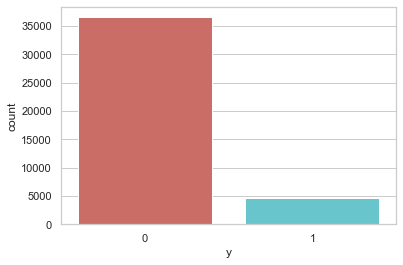

<Figure size 432x288 with 0 Axes>

In [9]:
sns.countplot(x='y',data=data, palette='hls')
plt.show()
plt.savefig('count_plot')

There are 36548 no's and 4640 yes's in the outcome variables.

Let's get a sense of the numbers across the two classes

In [10]:
data.groupby('y').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
y,,,,,,,,,,
0,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
1,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


Observations:

The average age of customers who bought the term deposit is higher than that of the customers who didn't.
The pdays (days since the customer was last contacted) is understandably lower for the customers who bought it. The lower the pdays, the better the memory of the last call and hence the better chances of a sale.
Surprisingly, campaigns (number of contacts or calls made during the current campaign) are lower for customers who bought the term deposit.

We can calculate categorical means for other categorical variables such as education and marital status to get a more detailed sense of our data.

In [11]:
data.groupby('job').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
job,,,,,,,,,,,
admin.,38.187296,254.312128,2.623489,954.319229,0.189023,0.015563,93.534054,-40.245433,3.550274,5164.125350,0.129726
blue-collar,39.555760,264.542360,2.558461,985.160363,0.122542,0.248995,93.656656,-41.375816,3.771996,5175.615150,0.068943
entrepreneur,41.723214,263.267857,2.535714,981.267170,0.138736,0.158723,93.605372,-41.283654,3.791120,5176.313530,0.085165
housemaid,45.500000,250.454717,2.639623,960.579245,0.137736,0.433396,93.676576,-39.495283,4.009645,5179.529623,0.100000
management,42.362859,257.058140,2.476060,962.647059,0.185021,-0.012688,93.522755,-40.489466,3.611316,5166.650513,0.112175
retired,62.027326,273.712209,2.476744,897.936047,0.327326,-0.698314,93.430786,-38.573081,2.770066,5122.262151,0.252326
self-employed,39.949331,264.142153,2.660802,976.621393,0.143561,0.094159,93.559982,-40.488107,3.689376,5170.674384,0.104856
services,37.926430,258.398085,2.587805,979.974049,0.154951,0.175359,93.634659,-41.290048,3.699187,5171.600126,0.081381
student,25.894857,283.683429,2.104000,840.217143,0.524571,-1.408000,93.331613,-40.187543,1.884224,5085.939086,0.314286


In [12]:
data.groupby('marital').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
marital,,,,,,,,,,,
divorced,44.899393,253.790330,2.61340,968.639853,0.168690,0.163985,93.606563,-40.707069,3.715603,5170.878643,0.103209
married,42.307165,257.438623,2.57281,967.247673,0.155608,0.183625,93.597367,-40.270659,3.745832,5171.848772,0.101573
single,33.158714,261.524378,2.53380,949.909578,0.211359,-0.167989,93.517300,-40.918698,3.317447,5155.199265,0.140041
unknown,40.275000,312.725000,3.18750,937.100000,0.275000,-0.221250,93.471250,-40.820000,3.313038,5157.393750,0.150000


In [13]:
data.groupby('education').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
education,,,,,,,,,,,
Basic,42.163910,263.043874,2.559498,974.877967,0.141053,0.191329,93.639933,-40.927595,3.729654,5172.014113,0.087029
high.school,37.998213,260.886810,2.568576,964.358382,0.185917,0.032937,93.584857,-40.940641,3.556157,5164.994735,0.108355
illiterate,48.500000,276.777778,2.277778,943.833333,0.111111,-0.133333,93.317333,-39.950000,3.516556,5171.777778,0.222222
professional.course,40.080107,252.533855,2.586115,960.765974,0.163075,0.173012,93.569864,-40.124108,3.710457,5170.155979,0.113485
university.degree,38.879191,253.223373,2.563527,951.807692,0.192390,-0.028090,93.493466,-39.975805,3.529663,5163.226298,0.137245
unknown,43.481225,262.390526,2.596187,942.830734,0.226459,0.059099,93.658615,-39.877816,3.571098,5159.549509,0.145003


Visualizations

The frequency of purchase of the deposit depends a great deal on the job title. Thus, the job title can be a good predictor of the outcome variable.

Hard to see, but the marital status does not seem a strong predictor for the outcome variable.

Education seems a good predictor of the outcome variable.

Day of week may not be a good predictor of the outcome

Month might be a good predictor of the outcome variable

The most of the customers of the bank in this dataset are in the age range of 30-40.

Poutcome seems to be a good predictor of the outcome variable.

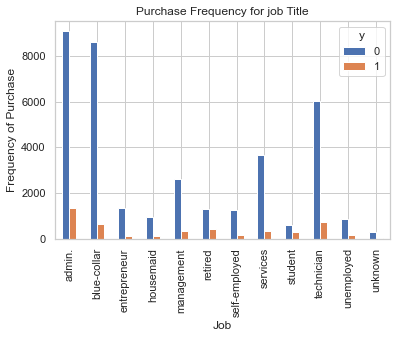

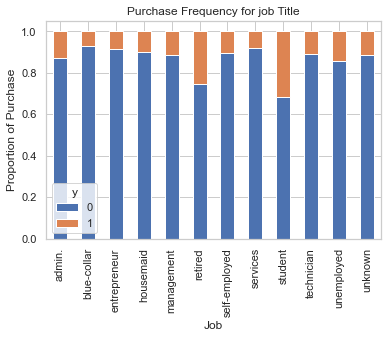

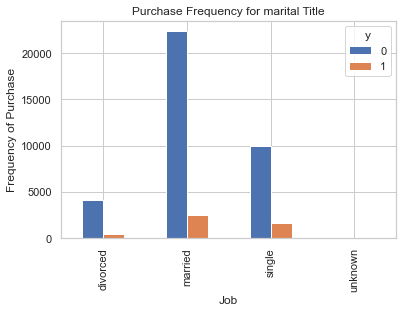

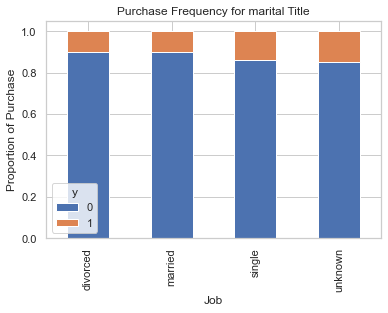

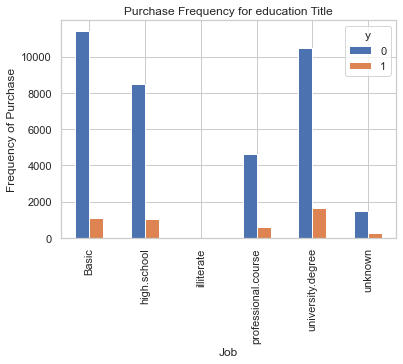

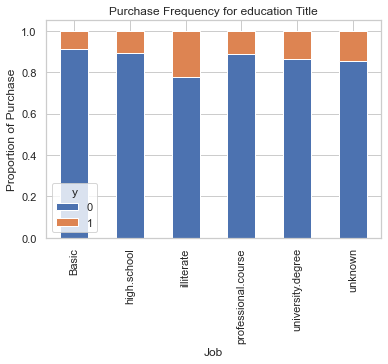

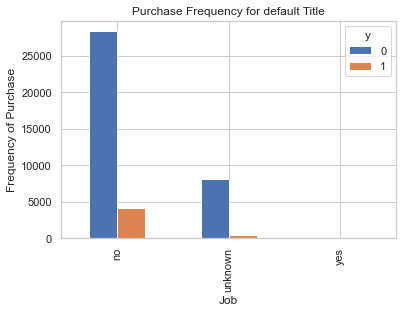

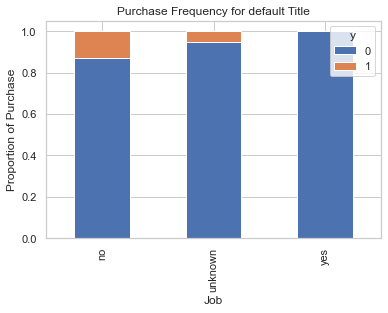

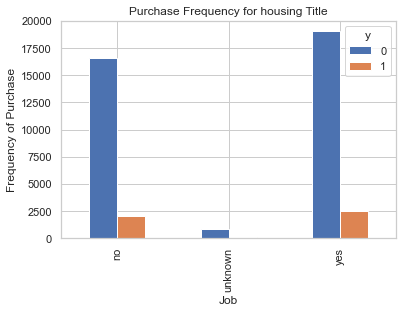

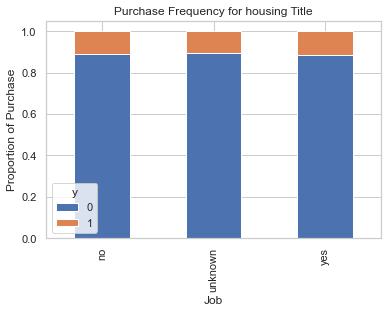

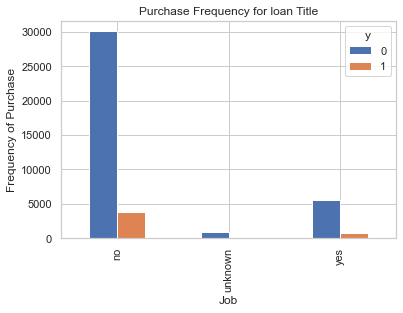

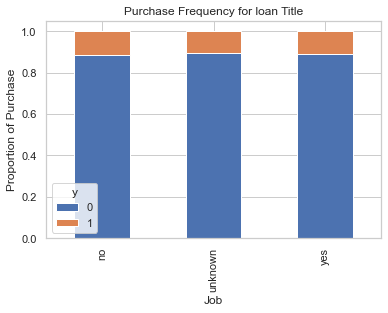

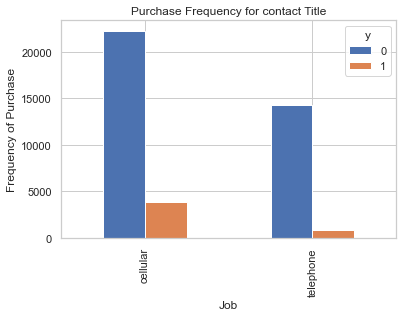

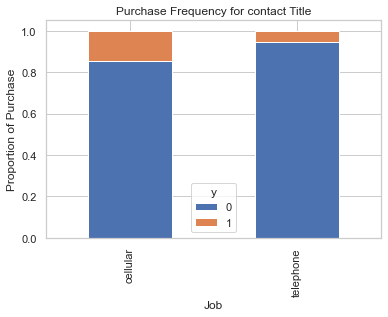

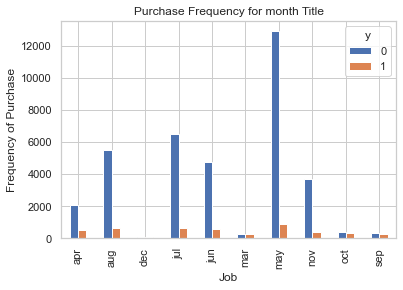

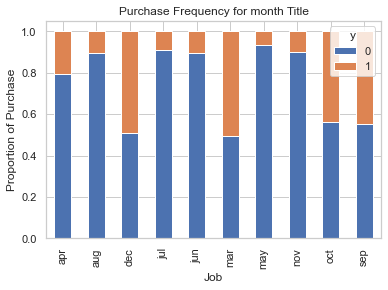

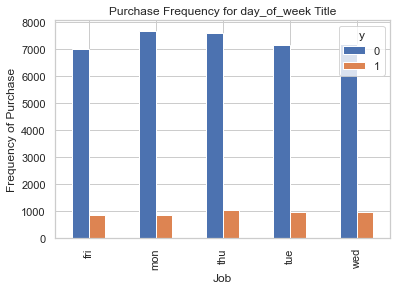

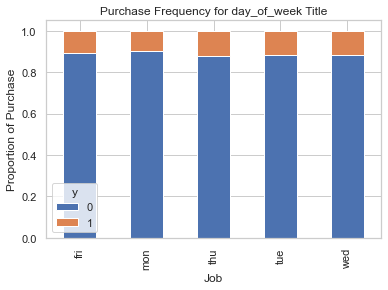

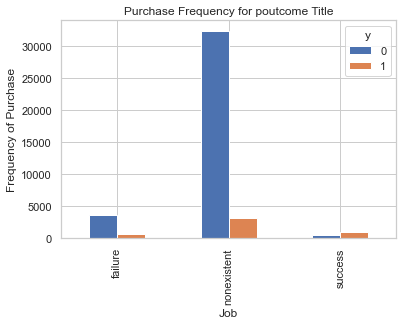

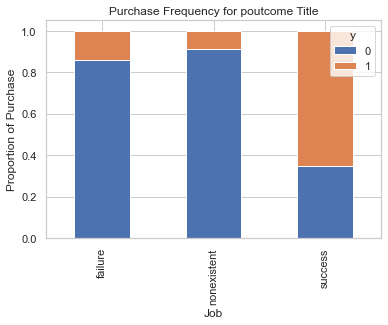

In [14]:
%matplotlib inline
cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
for i in cat_vars:
    pd.crosstab(data[i],data.y).plot(kind='bar')
    plt.title('Purchase Frequency for '+i+ ' Title')
    plt.xlabel('Job')
    plt.ylabel('Frequency of Purchase')
    plt.savefig('purchase_fre_job')
    plt.show()
    table=pd.crosstab(data[i],data.y)
    table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
    plt.title('Purchase Frequency for '+i+ ' Title')
    plt.xlabel('Job')
    plt.ylabel('Proportion of Purchase')
    plt.savefig('purchase_fre_job')
    

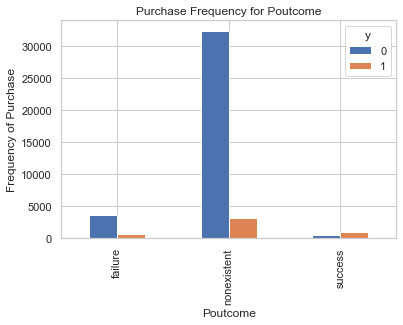

In [15]:
pd.crosstab(data.poutcome,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Poutcome')
plt.xlabel('Poutcome')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_fre_pout_bar')

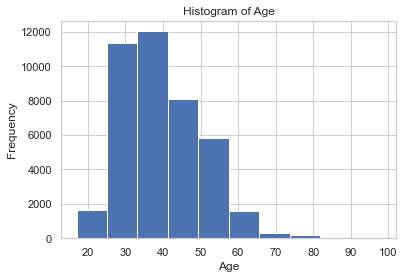

In [16]:
data.age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('hist_age')

In [17]:
##chi square Test for weekly

In [18]:
for i in ['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']:
    contingency_table=pd.crosstab(data[i],data["y"])
    Observed_Values = contingency_table.values 

    import scipy.stats
    b=scipy.stats.chi2_contingency(contingency_table)     # ((sumof row)*(sum of column))/(total)
    Expected_Values = b[3]

    no_of_rows=len(contingency_table.iloc[0:2,0])
    no_of_columns=len(contingency_table.iloc[0,0:2])
    df=(no_of_rows-1)*(no_of_columns-1)
    
    from scipy.stats import chi2
    chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
    chi_square_statistic=chi_square[0]+chi_square[1]

    p_value=1-chi2.cdf(x=chi_square_statistic,df=df)
    print('p-value of '+i+" : ",p_value)

p-value of job :  0.0
p-value of marital :  0.0
p-value of education :  0.0
p-value of default :  0.0
p-value of housing :  0.017115456280523023
p-value of loan :  0.2955805535078393
p-value of contact :  0.0
p-value of month :  0.0
p-value of day_of_week :  3.1672614708710967e-07
p-value of poutcome :  0.0


### Create dummy variables

cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var)
    data1=data.join(cat_list)
    data=data1

In [19]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,Basic,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,Basic,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [20]:
cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
data1=data.copy()
data1.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,Basic,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,Basic,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [21]:
for var in cat_vars:
    cat_list = pd.get_dummies(data[var], prefix=var)
    cat_list[var] = data[var].tolist()
    data1=pd.concat([data1,cat_list],axis=1)
print(data1.columns)
print(data1.head())
# print(data.columns)


Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown', 'job',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'marital', 'education_Basic',
       'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'education', 'default_no', 'default_unknown',
       'default_yes', 'default', 'housing_no', 'housing_unknown',
       'housing_yes', 'housing', 'loan_no', 'loan_unknown', 'loan_yes', 'loan',
       'contact_cellular', 

In [22]:
data1.drop(cat_vars,axis=1,inplace=True)

In [23]:
data1.head()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,44,210,1,999,0,1.4,93.444,-36.1,4.963,5228.1,...,0,0,0,0,1,0,0,0,1,0
1,53,138,1,999,0,-0.1,93.200,-42.0,4.021,5195.8,...,0,0,1,0,0,0,0,0,1,0
2,28,339,3,6,2,-1.7,94.055,-39.8,0.729,4991.6,...,0,0,0,0,1,0,0,0,0,1
3,39,185,2,999,0,-1.8,93.075,-47.1,1.405,5099.1,...,0,0,1,0,0,0,0,0,1,0
4,55,137,1,3,1,-2.9,92.201,-31.4,0.869,5076.2,...,0,0,1,0,0,0,0,0,0,1


cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

data_final=data[to_keep]
data_final.columns.values

# data_final_vars=data_final.columns.values.tolist()
y=['y']
X=[i for i in data_final_vars if i not in y]

In [24]:
x = data1.drop('y',axis = 1)
x.head()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,44,210,1,999,0,1.4,93.444,-36.1,4.963,5228.1,...,0,0,0,0,1,0,0,0,1,0
1,53,138,1,999,0,-0.1,93.200,-42.0,4.021,5195.8,...,0,0,1,0,0,0,0,0,1,0
2,28,339,3,6,2,-1.7,94.055,-39.8,0.729,4991.6,...,0,0,0,0,1,0,0,0,0,1
3,39,185,2,999,0,-1.8,93.075,-47.1,1.405,5099.1,...,0,0,1,0,0,0,0,0,1,0
4,55,137,1,3,1,-2.9,92.201,-31.4,0.869,5076.2,...,0,0,1,0,0,0,0,0,0,1


In [25]:
y = data1['y']
y.shape

(41188,)

# Splitting data

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 3)

# Splitting data for Sampling Techniques Random & SMOTE over sampling

In [27]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
x_trainro,y_trainro = ros.fit_sample(x_train,y_train)

In [28]:
from imblearn.over_sampling import SMOTE
sm =  SMOTE()
x_trainsm,y_trainsm = sm.fit_sample(x_train,y_train)

### Feature Selection

Optimal number of features : 56


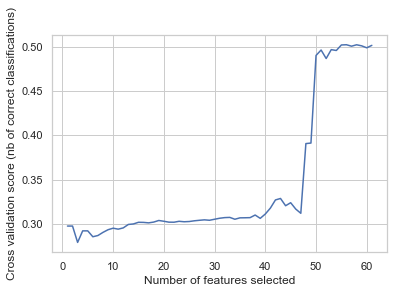

In [30]:
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

##fi score is best for imbalance data otherwise prefer accuracy
rfecv = RFECV(estimator=logreg, step=1,
              scoring='f1')
rfecv.fit(x, y)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [ ]:
# import sklearn
# sklearn.metrics.SCORERS.keys()

In [31]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

rfe = RFE(logreg, 18)
rfe = rfe.fit(x,y)
print(rfe.support_)
print(rfe.ranking_)

[False False False False  True False False False  True False False  True
 False False False  True False  True  True False False False False False
 False False False False False False False False  True False False False
 False False False False False  True False  True  True  True False False
  True  True  True  True False False  True False False False  True False
  True]
[33 31 11 38  1 15 20 17  1 30 29  1  5 37 39  1 40  1  1 13 27 42 32 25
 12 44  8  9 41 23 22  2  1 10 43 36 35 21 14 34 24  1 19  1  1  1  4 16
  1  1  1  1 28 26  1  7  6  3  1 18  1]


The Recursive Feature Elimination (RFE) has helped us select the following features: "previous", "euribor3m", "job_blue-collar", "job_retired", "job_services", "job_student", "default_no", "month_aug", "month_dec", "month_jul", "month_nov", "month_oct", "month_sep", "day_of_week_fri", "day_of_week_wed", "poutcome_failure", "poutcome_nonexistent", "poutcome_success".

In [ ]:
## removing 'age','day_of_week_fri','day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue','day_of_week_fri','day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue','day_of_week_wed' 'day_of_week_wed','housing_no', 'housing_unknown','housing_yes', 'loan_no', 'loan_unknown', 'loan_yes', 
x = ['duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_Basic', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'poutcome_failure', 'poutcome_nonexistent',
       'poutcome_success']

### Implementing the model

#### Compute precision, recall, F-measure and support

The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.

The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.

The F-beta score weights recall more than precision by a factor of beta. beta == 1.0 means recall and precision are equally important.

The support is the number of occurrences of each class in y_test.

In [33]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train,x_train)
result=logit_model.fit()
print(result.summary())

         Current function value: 0.208742
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                32950
Model:                          Logit   Df Residuals:                    32899
Method:                           MLE   Df Model:                           50
Date:                Thu, 08 Oct 2020   Pseudo R-squ.:                  0.4077
Time:                        19:24:07   Log-Likelihood:                -6878.0
converged:                      False   LL-Null:                       -11612.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
age                               0.0009      0.003      0.342      0.732      -0.004       0.006
duration

F1 score --- refers to both precison and recall (harmonic mean) F2 score --- refers to more recall than precision .. For our scenario recall is more important

The p-values for most of the variables are very small, therefore, most of them are significant to the model.

### Logistic Regression Model Fitting with direct X and Y train dataset

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
result = logreg.fit(x_train, y_train)

#### Predicting the test set results and caculating the accuracy

In [35]:
from sklearn.metrics import f1_score,accuracy_score,fbeta_score
y_pred = logreg.predict(x_test)
print("Accuracy: ",accuracy_score(y_test,y_pred))
print("f1_score: ",f1_score(y_test,y_pred))
print("f2_score: ",fbeta_score(y_test,y_pred,2))

Accuracy:  0.9095654285020636
f1_score:  0.4983164983164983
f2_score:  0.4351917195953893


In [36]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[7123  193]
 [ 552  370]]


The result is telling us that we have 7123+370 correct predictions and 193+552 incorrect predictions.

In [98]:
#Applying cross fold to Logistic regression using train data

In [208]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.metrics import fbeta_score,make_scorer
kfold = model_selection.KFold(n_splits=10,random_state=42)
modelCV = LogisticRegression()
print(x.shape)
for train_index, test_index in kfold.split(x):
    X_train,X_test,Y_train,Y_test = x.loc[train_index],x.loc[test_index],y[train_index],y[test_index]

(41188, 61)


In [209]:
modelCV.fit(X_train,Y_train)
from sklearn.metrics import f1_score,accuracy_score,fbeta_score
y_pred = modelCV.predict(X_test)
print("Accuracy: ",accuracy_score(Y_test,y_pred))
print("f1_score: ",f1_score(Y_test,y_pred))
print("f2_score: ",fbeta_score(Y_test,y_pred,2))

Accuracy:  0.9133074307916464
f1_score:  0.4992987377279102
f2_score:  0.43777668470241016


# Logistic Regression Model Fitting with direct X and Y Random oversampling train 

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
result = logreg.fit(x_trainro, y_trainro)

# Predicting the test set results and caculating the accuracy

In [204]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'f1'
results = model_selection.cross_val_score(modelCV, x_trainsm, y_trainsm, cv=kfold, scoring=scoring)
print("10-fold cross validation average f1: %.3f" % (results.mean()))

10-fold cross validation average f1: 0.762


In [205]:
from sklearn.metrics import f1_score,accuracy_score,fbeta_score
y_pred = logreg.predict(x_test)
print("Accuracy: ",accuracy_score(y_test,y_pred))
print("f1_score: ",f1_score(y_test,y_pred))
print("f2_score: ",fbeta_score(y_test,y_pred,2))

Accuracy:  0.8936635105608157
f1_score:  0.5701668302257115
f2_score:  0.6047044129891758


In [203]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[6781  535]
 [ 341  581]]


The result is telling us that we have 6230+796 correct predictions and 126+1086 incorrect predictions.

In [100]:
#Applying cross fold to Logistic regression using Random oversampling train data

In [211]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
x_trainro,y_trainro = ros.fit_sample(X_train,Y_train)

In [212]:
modelCV.fit(x_trainro,y_trainro)
from sklearn.metrics import f1_score,accuracy_score,fbeta_score
y_pred = modelCV.predict(X_test)
print("Accuracy: ",accuracy_score(Y_test,y_pred))
print("f1_score: ",f1_score(Y_test,y_pred))
print("f2_score: ",fbeta_score(Y_test,y_pred,2))

Accuracy:  0.8467702768334143
f1_score:  0.5437454808387563
f2_score:  0.6955234924158342


# Logistic Regression Model Fitting with direct X and Y SMOTE oversampling train

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
result = logreg.fit(x_trainsm, y_trainsm)

# Predicting the test set results and caculating the accuracy

In [96]:
from sklearn.metrics import f1_score,accuracy_score,fbeta_score
y_pred = logreg.predict(x_test)
print("Accuracy: ",accuracy_score(y_test,y_pred))
print("f1_score: ",f1_score(y_test,y_pred))
print("f2_score: ",fbeta_score(y_test,y_pred,2))

Accuracy:  0.8936635105608157
f1_score:  0.5701668302257115
f2_score:  0.6047044129891758


In [97]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[6781  535]
 [ 341  581]]


The result is telling us that we have 6727+658 correct predictions and 589+264 incorrect predictions.

In [102]:
#Applying cross fold to Logistic regression using SMOTE oversampling train data

In [149]:
from imblearn.over_sampling import SMOTE
sm =  SMOTE()
x_trainsm,y_trainsm = sm.fit_sample(X_train,Y_train)

In [150]:
modelCV.fit(x_trainsm,y_trainsm)
from sklearn.metrics import f1_score,accuracy_score,fbeta_score
y_pred = modelCV.predict(X_test)
print("Accuracy: ",accuracy_score(Y_test,y_pred))
print("f1_score: ",f1_score(Y_test,y_pred))
print("f2_score: ",fbeta_score(Y_test,y_pred,2))

Accuracy:  0.8970373967945605
f1_score:  0.5619834710743802
f2_score:  0.5944055944055944


# Decision Tree Model Fitting with direct X and Y

In [67]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()          # Decision Tree
decision_tree.fit(x_train, y_train)
y_pred = decision_tree.predict(x_test)

from sklearn.metrics import f1_score,accuracy_score,fbeta_score
y_pred = decision_tree.predict(x_test)
print("Accuracy: ",accuracy_score(y_test,y_pred))
print("f1_score: ",f1_score(y_test,y_pred))
print("f2_score: ",fbeta_score(y_test,y_pred,2))


Accuracy:  0.8883224083515416
f1_score:  0.5048439181916039
f2_score:  0.5071366782006921


In [44]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[6844  472]
 [ 460  462]]


The result is telling us that we have 6856+471 correct predictions and 451+460 incorrect predictions.

In [ ]:
#Applying cross fold to Decision tree using train data

In [90]:
# import sklearn
# sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [224]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.metrics import fbeta_score,make_scorer
from sklearn.metrics import f1_score,accuracy_score,fbeta_score
kfold = model_selection.KFold(n_splits=10,random_state=42)
modelCV = DecisionTreeClassifier(max_depth=5)
print(x.shape)
for train_index, test_index in kfold.split(x):
    X_train,X_test,Y_train,Y_test = x.loc[train_index],x.loc[test_index],y[train_index],y[test_index]
#     print(X_train.shape)
    ros = RandomOverSampler()
    x_trainro,y_trainro = ros.fit_sample(X_train,Y_train)
    
    modelCV.fit(x_trainro,y_trainro)
    y_pred = modelCV.predict(X_test)
    print("Accuracy: ",accuracy_score(Y_test,y_pred))
    print("f1_score: ",f1_score(Y_test,y_pred))
    print("f2_score: ",fbeta_score(Y_test,y_pred,2))      


(41188, 61)
Accuracy:  0.8460791454236465
f1_score:  0.58777633289987
f2_score:  0.7581348540758135
Accuracy:  0.8395241563486283
f1_score:  0.5560779046339825
f2_score:  0.7275922671353252
Accuracy:  0.8137897547948532
f1_score:  0.529158993247391
f2_score:  0.7226693494299128
Accuracy:  0.8383102694828842
f1_score:  0.5763358778625954
f2_score:  0.7438423645320197
Accuracy:  0.8421947074532653
f1_score:  0.5768229166666667
f2_score:  0.7383333333333333
Accuracy:  0.8431658169458607
f1_score:  0.5721854304635762
f2_score:  0.7435456110154905
Accuracy:  0.8438941490653071
f1_score:  0.5664194200944033
f2_score:  0.7420494699646645
Accuracy:  0.834425831512503
f1_score:  0.5622593068035944
f2_score:  0.7319518716577539
Accuracy:  0.8460417678484702
f1_score:  0.5633608815426998
f2_score:  0.7337639038392537
Accuracy:  0.8326857697911607
f1_score:  0.5403602401601068
f2_score:  0.7183398368215679


In [ ]:
#tunning maxdepth with decision tree after random over sampling 

test_f2 score:  0.7469836763662172


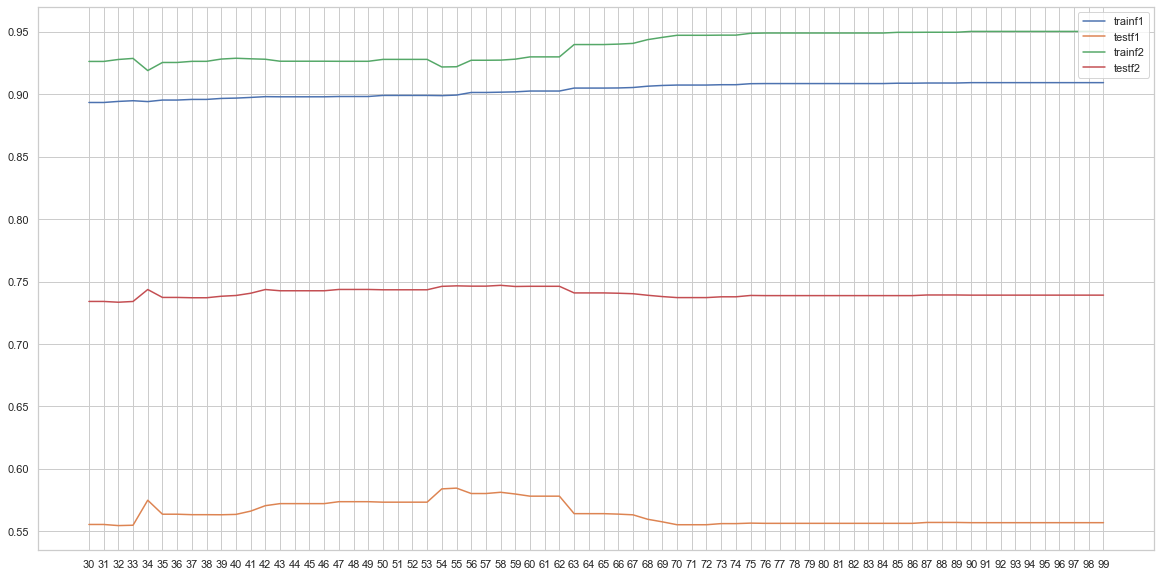

In [248]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,f1_score,fbeta_score
from imblearn.over_sampling import RandomOverSampler

def Tuningmaxdepth(df):
    x = df.drop(["y"],axis =1)
    y = df["y"]
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)
    ros = RandomOverSampler()
    x_trainro,y_trainro = ros.fit_sample(X_train,y_train)
    
    train_f1 = []
    test_f1 = []
    train_f2 = []
    test_f2 = []

    for k in range(30,100):
        decision_tree = DecisionTreeClassifier(criterion = "entropy",min_impurity_decrease=0.0005, max_leaf_nodes = k)          # Decision Tree
        decision_tree.fit(x_trainro, y_trainro)
        y_pred_Tr = decision_tree.predict(x_trainro)
        y_pred_Te = decision_tree.predict(X_test)

        train_f1.append((f1_score(y_trainro,y_pred_Tr)))
        test_f1.append((f1_score(y_test,y_pred_Te)))
        
        train_f2.append((fbeta_score(y_trainro,y_pred_Tr,2)))
        test_f2.append((fbeta_score(y_test,y_pred_Te,2)))
    print('test_f2 score: ',max(test_f2))     
    plt.figure(figsize = (20,10))    
    plt.plot(range(30,100),train_f1, label = "trainf1")
    plt.plot(range(30,100),test_f1, label = "testf1")
    plt.plot(range(30,100),train_f2, label = "trainf2")
    plt.plot(range(30,100),test_f2, label = "testf2")
    plt.xticks(range(30,100))
    plt.legend()
    plt.show()
    
Tuningmaxdepth(data1)

In [194]:
#tunning maxdepth with decision tree after Smote over sampling 

test_f2 score :  0.7292599892492385


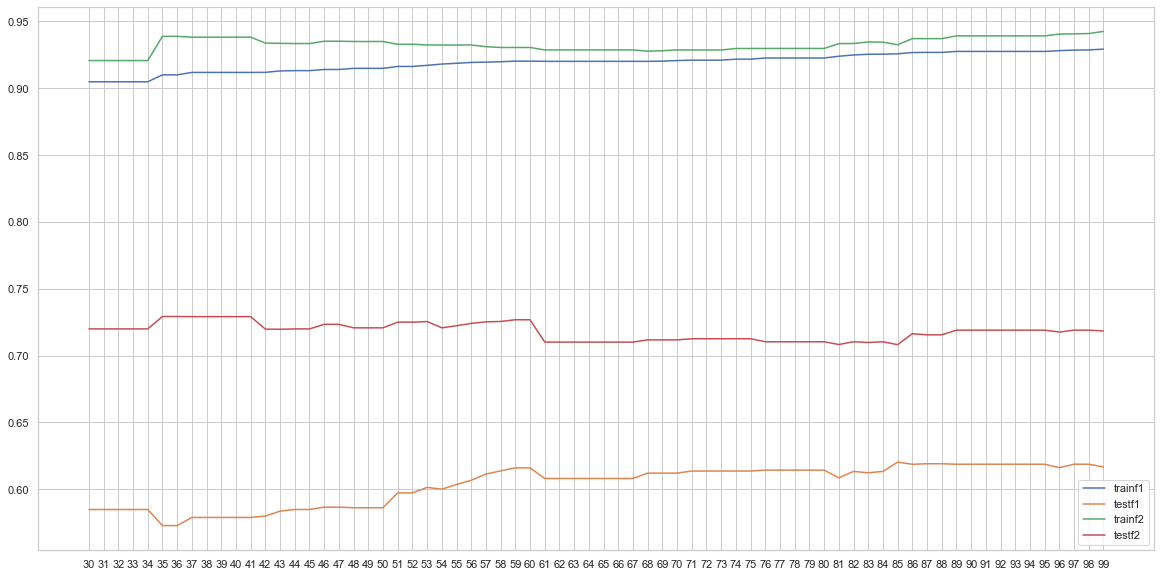

In [247]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,f1_score,fbeta_score
from imblearn.over_sampling import SMOTE

def Tuningmaxdepth(df):
    x = df.drop(["y"],axis =1)
    y = df["y"]
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)

    sm =  SMOTE()
    x_trainsm,y_trainsm = sm.fit_sample(X_train,y_train)
    
    train_f1 = []
    test_f1 = []
    train_f2 = []
    test_f2 = []

    for k in range(30,100):
        decision_tree = DecisionTreeClassifier(criterion = "entropy",min_impurity_decrease=0.0005, max_leaf_nodes = k)          # Decision Tree
        decision_tree.fit(x_trainsm, y_trainsm)
        y_pred_Tr = decision_tree.predict(x_trainsm)
        y_pred_Te = decision_tree.predict(X_test)

        train_f1.append((f1_score(y_trainsm,y_pred_Tr)))
        test_f1.append((f1_score(y_test,y_pred_Te)))
        
        train_f2.append((fbeta_score(y_trainsm,y_pred_Tr,2)))
        test_f2.append((fbeta_score(y_test,y_pred_Te,2)))
    print('test_f2 score : ',max(test_f2))   
    plt.figure(figsize = (20,10))    
    plt.plot(range(30,100),train_f1, label = "trainf1")
    plt.plot(range(30,100),test_f1, label = "testf1")
    plt.plot(range(30,100),train_f2, label = "trainf2")
    plt.plot(range(30,100),test_f2, label = "testf2")
    plt.xticks(range(30,100))
    plt.legend()
    plt.show()
    
Tuningmaxdepth(data1)

# DecisionTree  Model Fitting with direct X and Y Random oversampling train

In [45]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()          # Decision Tree
decision_tree.fit(x_trainro, y_trainro)
y_pred = decision_tree.predict(x_test)

from sklearn.metrics import f1_score,accuracy_score,fbeta_score
y_pred = decision_tree.predict(x_test)
print("Accuracy: ",accuracy_score(y_test,y_pred))
print("f1_score: ",f1_score(y_test,y_pred))
print("f2_score: ",fbeta_score(y_test,y_pred,2))

Accuracy:  0.894027676620539
f1_score:  0.5221674876847291
f2_score:  0.5192684519921621


In [46]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[6888  428]
 [ 445  477]]


In [ ]:
# The result is telling us that we have 6873+459 correct predictions and 443+463 incorrect predictions.

In [ ]:
# Applying cross fold to Decision tree using random oversampling train data

In [215]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
x_trainro,y_trainro = ros.fit_sample(X_train,Y_train)

In [216]:
modelCV.fit(x_trainro,y_trainro)
from sklearn.metrics import f1_score,accuracy_score,fbeta_score
y_pred = modelCV.predict(X_test)
print("Accuracy: ",accuracy_score(Y_test,y_pred))
print("f1_score: ",f1_score(Y_test,y_pred))
print("f2_score: ",fbeta_score(Y_test,y_pred,2))

Accuracy:  0.8389995143273433
f1_score:  0.5281138790035588
f2_score:  0.6807339449541285


# DecisionTree Model Fitting with direct X and Y SMOTE oversampling train

In [47]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()          # Decision Tree
decision_tree.fit(x_trainsm, y_trainsm)
y_pred = decision_tree.predict(x_test)

from sklearn.metrics import f1_score,accuracy_score,fbeta_score
y_pred = decision_tree.predict(x_test)
print("Accuracy: ",accuracy_score(y_test,y_pred))
print("f1_score: ",f1_score(y_test,y_pred))
print("f2_score: ",fbeta_score(y_test,y_pred,2))

Accuracy:  0.8888079630978393
f1_score:  0.5248962655601659
f2_score:  0.5389859394972305


In [48]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[6816  500]
 [ 416  506]]


The result is telling us that we have 6795+494 correct predictions and 521+428 incorrect predictions.

In [ ]:
#Applying cross fold to Decision tree using SMOTE oversampling train data

In [139]:
from imblearn.over_sampling import SMOTE
sm =  SMOTE()
x_trainsm,y_trainsm = sm.fit_sample(X_train,Y_train)

In [141]:
modelCV.fit(x_trainsm,y_trainsm)
from sklearn.metrics import f1_score,accuracy_score,fbeta_score
y_pred = modelCV.predict(X_test)
print("Accuracy: ",accuracy_score(Y_test,y_pred))
print("f1_score: ",f1_score(Y_test,y_pred))
print("f2_score: ",fbeta_score(Y_test,y_pred,2))

Accuracy:  0.8868382710053424
f1_score:  0.4934782608695652
f2_score:  0.5066964285714286


# Naive Bayes Model with X and y training dataset

In [49]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB() 
gnb.fit(x_train, y_train)
y_pred = gnb.predict(x_test)
print("Accuracy: ",accuracy_score(y_test,y_pred))
print("f1_score: ",f1_score(y_test,y_pred))
print("f2_score: ",fbeta_score(y_test,y_pred,2))
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)


Accuracy:  0.8647730031561058
f1_score:  0.4633911368015414
f2_score:  0.49669558033870304
[[6643  673]
 [ 441  481]]


In [111]:
#Applying cross fold to Naive Bayes using train data

In [151]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.metrics import fbeta_score,make_scorer
kfold = model_selection.KFold(n_splits=10,random_state=42)
modelCV = GaussianNB()
print(x.shape)
for train_index, test_index in kfold.split(x):
    X_train,X_test,Y_train,Y_test = x.loc[train_index],x.loc[test_index],y[train_index],y[test_index]

(41188, 61)


In [152]:
modelCV.fit(X_train,Y_train)
from sklearn.metrics import f1_score,accuracy_score,fbeta_score
y_pred = modelCV.predict(X_test)
print("Accuracy: ",accuracy_score(Y_test,y_pred))
print("f1_score: ",f1_score(Y_test,y_pred))
print("f2_score: ",fbeta_score(Y_test,y_pred,2))

Accuracy:  0.8671685284118504
f1_score:  0.46425073457394717
f2_score:  0.5061939342161471


# Naive Bayes Model with X and y Random over sampling training dataset

In [113]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB() 
gnb.fit(x_trainro, y_trainro)
y_pred = gnb.predict(x_test)
print("Accuracy: ",accuracy_score(y_test,y_pred))
print("f1_score: ",f1_score(y_test,y_pred))
print("f2_score: ",fbeta_score(y_test,y_pred,2))
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

Accuracy:  0.8514202476329206
f1_score:  0.4692107545533391
f2_score:  0.5333201892744479
[[6473  843]
 [ 381  541]]


In [ ]:
#Applying cross fold to Naive Bayes using Random oversampling train data

In [153]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
x_trainro,y_trainro = ros.fit_sample(X_train,Y_train)

In [154]:
modelCV.fit(x_trainro,y_trainro)
from sklearn.metrics import f1_score,accuracy_score,fbeta_score
y_pred = modelCV.predict(X_test)
print("Accuracy: ",accuracy_score(Y_test,y_pred))
print("f1_score: ",f1_score(Y_test,y_pred))
print("f2_score: ",fbeta_score(Y_test,y_pred,2))

Accuracy:  0.8474987858183585
f1_score:  0.451048951048951
f2_score:  0.523538961038961


# Naive Bayes Model with X and y SMOTE over sampling training dataset

In [108]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB() 
gnb.fit(x_trainsm, y_trainsm)
y_pred = gnb.predict(x_test)
print("Accuracy: ",accuracy_score(y_test,y_pred))
print("f1_score: ",f1_score(y_test,y_pred))
print("f2_score: ",fbeta_score(y_test,y_pred,2))
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

Accuracy:  0.844743869871328
f1_score:  0.4246513720197931
f2_score:  0.4730406895169373
[[6487  829]
 [ 450  472]]


In [106]:
#Applying cross fold to Naive Bayes using SMOTE oversampling train data

In [155]:
from imblearn.over_sampling import SMOTE
sm =  SMOTE()
x_trainsm,y_trainsm = sm.fit_sample(X_train,Y_train)

In [156]:
modelCV.fit(x_trainsm,y_trainsm)
from sklearn.metrics import f1_score,accuracy_score,fbeta_score
y_pred = modelCV.predict(X_test)
print("Accuracy: ",accuracy_score(Y_test,y_pred))
print("f1_score: ",f1_score(Y_test,y_pred))
print("f2_score: ",fbeta_score(Y_test,y_pred,2))

Accuracy:  0.8445847498785818
f1_score:  0.4029850746268656
f2_score:  0.451505016722408


# SVM with x and Y train dataset

In [109]:
from sklearn import svm
cls = svm.SVC(kernel="linear") 
cls.fit(x_train, y_train)
y_pred = cls.predict(x_test)
print("Accuracy: ",accuracy_score(y_test,y_pred))
print("f1_score: ",f1_score(y_test,y_pred))
print("f2_score: ",fbeta_score(y_test,y_pred,2))
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

Accuracy:  0.8909929594561787
f1_score:  0.47238542890716806
f2_score:  0.44986571172784245
[[6938  378]
 [ 520  402]]


In [ ]:
#Applying cross fold to SVM using train data

In [157]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.metrics import fbeta_score,make_scorer
kfold = model_selection.KFold(n_splits=10,random_state=42)
modelCV = svm.SVC(kernel="linear")
print(x.shape)
for train_index, test_index in kfold.split(x):
    X_train,X_test,Y_train,Y_test = x.loc[train_index],x.loc[test_index],y[train_index],y[test_index]

(41188, 61)


In [158]:
modelCV.fit(X_train,Y_train)
from sklearn.metrics import f1_score,accuracy_score,fbeta_score
y_pred = modelCV.predict(X_test)
print("Accuracy: ",accuracy_score(Y_test,y_pred))
print("f1_score: ",f1_score(Y_test,y_pred))
print("f2_score: ",fbeta_score(Y_test,y_pred,2))

Accuracy:  0.9123360854783875
f1_score:  0.485021398002853
f2_score:  0.42058386937159825


# SVM with x and Y Random Over sampling train dataset

In [110]:
from sklearn import svm
cls = svm.SVC(kernel="linear") 
cls.fit(x_trainro, y_trainro)
y_pred = cls.predict(x_test)
print("Accuracy: ",accuracy_score(y_test,y_pred))
print("f1_score: ",f1_score(y_test,y_pred))
print("f2_score: ",fbeta_score(y_test,y_pred,2))
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

Accuracy:  0.8851663025006069
f1_score:  0.5803016858917479
f2_score:  0.651394422310757
[[6638  678]
 [ 268  654]]


In [ ]:
#Applying cross fold to SVM using Random oversampling train data

In [160]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
x_trainro,y_trainro = ros.fit_sample(X_train,Y_train)

In [161]:
modelCV.fit(x_trainro,y_trainro)
from sklearn.metrics import f1_score,accuracy_score,fbeta_score
y_pred = modelCV.predict(X_test)
print("Accuracy: ",accuracy_score(Y_test,y_pred))
print("f1_score: ",f1_score(Y_test,y_pred))
print("f2_score: ",fbeta_score(Y_test,y_pred,2))

Accuracy:  0.8873239436619719
f1_score:  0.5647279549718573
f2_score:  0.6307627829002515


# SVM with x and Y SMOTE Over sampling train dataset

In [54]:
from sklearn import svm
cls = svm.SVC(kernel="linear") 
cls.fit(x_trainsm, y_trainsm)
y_pred = cls.predict(x_test)
print("Accuracy: ",accuracy_score(y_test,y_pred))
print("f1_score: ",f1_score(y_test,y_pred))
print("f2_score: ",fbeta_score(y_test,y_pred,2))
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

Accuracy:  0.8998543335761107
f1_score:  0.45687952600394993
f2_score:  0.40490081680280043
[[7066  250]
 [ 575  347]]


In [ ]:
#Applying cross fold to SVM using SMOTE oversampling train data

In [162]:
from imblearn.over_sampling import SMOTE
sm =  SMOTE()
x_trainsm,y_trainsm = sm.fit_sample(X_train,Y_train)

In [163]:
modelCV.fit(x_trainsm,y_trainsm)
from sklearn.metrics import f1_score,accuracy_score,fbeta_score
y_pred = modelCV.predict(X_test)
print("Accuracy: ",accuracy_score(Y_test,y_pred))
print("f1_score: ",f1_score(Y_test,y_pred))
print("f2_score: ",fbeta_score(Y_test,y_pred,2))

Accuracy:  0.8135016998542982
f1_score:  0.43195266272189353
f2_score:  0.5464071856287426


# Random Forest with x and y train dataset 

In [118]:
from sklearn.ensemble import RandomForestClassifier
reg_rf = RandomForestClassifier()
reg_rf.fit(x_train, y_train)
y_pred = reg_rf.predict(x_test)
print("Accuracy: ",accuracy_score(y_test,y_pred))
print("f1_score: ",f1_score(y_test,y_pred))
print("f2_score: ",fbeta_score(y_test,y_pred,2))
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

Accuracy:  0.9135712551590192
f1_score:  0.5430038510911426
f2_score:  0.4891304347826087
[[7103  213]
 [ 499  423]]


In [119]:
#Applying cross fold to Random Forest using train data

In [165]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.metrics import fbeta_score,make_scorer
kfold = model_selection.KFold(n_splits=10,random_state=42)
modelCV = RandomForestClassifier()
print(x.shape)
for train_index, test_index in kfold.split(x):
    X_train,X_test,Y_train,Y_test = x.loc[train_index],x.loc[test_index],y[train_index],y[test_index]

(41188, 61)


In [166]:
modelCV.fit(X_train,Y_train)
from sklearn.metrics import f1_score,accuracy_score,fbeta_score
y_pred = modelCV.predict(X_test)
print("Accuracy: ",accuracy_score(Y_test,y_pred))
print("f1_score: ",f1_score(Y_test,y_pred))
print("f2_score: ",fbeta_score(Y_test,y_pred,2))

Accuracy:  0.9174356483729966
f1_score:  0.5405405405405405
f2_score:  0.48543689320388345


# Random Forest with x and y Random Over sampling train dataset

In [121]:
from sklearn.ensemble import RandomForestClassifier
reg_rf = RandomForestClassifier()
reg_rf.fit(x_trainro, y_trainro)
y_pred = reg_rf.predict(x_test)
print("Accuracy: ",accuracy_score(y_test,y_pred))
print("f1_score: ",f1_score(y_test,y_pred))
print("f2_score: ",fbeta_score(y_test,y_pred,2))
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

Accuracy:  0.9084729303228939
f1_score:  0.5782997762863534
f2_score:  0.567632850241546
[[6967  349]
 [ 405  517]]


In [164]:
 #Applying cross fold to Random Forest using Random oversampling train data

In [167]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
x_trainro,y_trainro = ros.fit_sample(X_train,Y_train)

In [168]:
modelCV.fit(x_trainro,y_trainro)
from sklearn.metrics import f1_score,accuracy_score,fbeta_score
y_pred = modelCV.predict(X_test)
print("Accuracy: ",accuracy_score(Y_test,y_pred))
print("f1_score: ",f1_score(Y_test,y_pred))
print("f2_score: ",fbeta_score(Y_test,y_pred,2))

Accuracy:  0.9099077221952404
f1_score:  0.57307249712313
f2_score:  0.568752855185016


# Random Forest with x and y SMOTE Over sampling train dataset

In [124]:
from sklearn.ensemble import RandomForestClassifier
reg_rf = RandomForestClassifier()
reg_rf.fit(x_trainsm, y_trainsm)
y_pred = reg_rf.predict(x_test)
print("Accuracy: ",accuracy_score(y_test,y_pred))
print("f1_score: ",f1_score(y_test,y_pred))
print("f2_score: ",fbeta_score(y_test,y_pred,2))
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

Accuracy:  0.9095654285020636
f1_score:  0.5503922751961375
f2_score:  0.5154872258647976
[[7037  279]
 [ 466  456]]


In [125]:
#Applying cross fold to Random Forest using SMOTE oversampling train data

In [169]:
from imblearn.over_sampling import SMOTE
sm =  SMOTE()
x_trainsm,y_trainsm = sm.fit_sample(X_train,Y_train)

In [170]:
modelCV.fit(x_trainsm,y_trainsm)
from sklearn.metrics import f1_score,accuracy_score,fbeta_score
y_pred = modelCV.predict(X_test)
print("Accuracy: ",accuracy_score(Y_test,y_pred))
print("f1_score: ",f1_score(Y_test,y_pred))
print("f2_score: ",fbeta_score(Y_test,y_pred,2))

Accuracy:  0.9123360854783875
f1_score:  0.5401273885350318
f2_score:  0.503562945368171


In [246]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.metrics import fbeta_score,make_scorer
from sklearn.metrics import f1_score,accuracy_score,fbeta_score
kfold = model_selection.KFold(n_splits=10,random_state=42)
modelCV = DecisionTreeClassifier(criterion = "entropy",min_impurity_decrease=0.0005)
print(x.shape)
f2_scor = []
for train_index, test_index in kfold.split(x):
    X_train,X_test,Y_train,Y_test = x.loc[train_index],x.loc[test_index],y[train_index],y[test_index]
#     print(X_train.shape)
    ros = RandomOverSampler()
    x_trainro,y_trainro = ros.fit_sample(X_train,Y_train)
    
    modelCV.fit(x_trainro,y_trainro)
    y_pred = modelCV.predict(X_test)
    print("Accuracy: ",accuracy_score(Y_test,y_pred))
    print("f1_score: ",f1_score(Y_test,y_pred))
    print("f2_score: ",fbeta_score(Y_test,y_pred,2))
    f2_scor.append(fbeta_score(Y_test,y_pred,2))
np.mean(f2_scor)

(41188, 61)
Accuracy:  0.8630735615440641
f1_score:  0.6194331983805669
f2_score:  0.7846153846153846
Accuracy:  0.848264141781986
f1_score:  0.5686680469289165
f2_score:  0.7344028520499108
Accuracy:  0.8472930322893907
f1_score:  0.5694729637234771
f2_score:  0.7391613361762615
Accuracy:  0.8487496965282836
f1_score:  0.5993569131832798
f2_score:  0.7694848084544255
Accuracy:  0.8526341344986648
f1_score:  0.5945223780895122
f2_score:  0.7514353259034109
Accuracy:  0.8487496965282836
f1_score:  0.5849433710859426
f2_score:  0.7579419889502762
Accuracy:  0.8652585579024035
f1_score:  0.6010064701653487
f2_score:  0.7633308984660337
Accuracy:  0.8489924739014324
f1_score:  0.5836680053547523
f2_score:  0.7445355191256832
Accuracy:  0.8372996600291404
f1_score:  0.5568783068783069
f2_score:  0.7393747804706708
Accuracy:  0.8358426420592521
f1_score:  0.552317880794702
f2_score:  0.7367491166077739


0.752103201081983

# From the above models Decision Tree with Random over sampling model gives better f2 score on test data with around 75% 

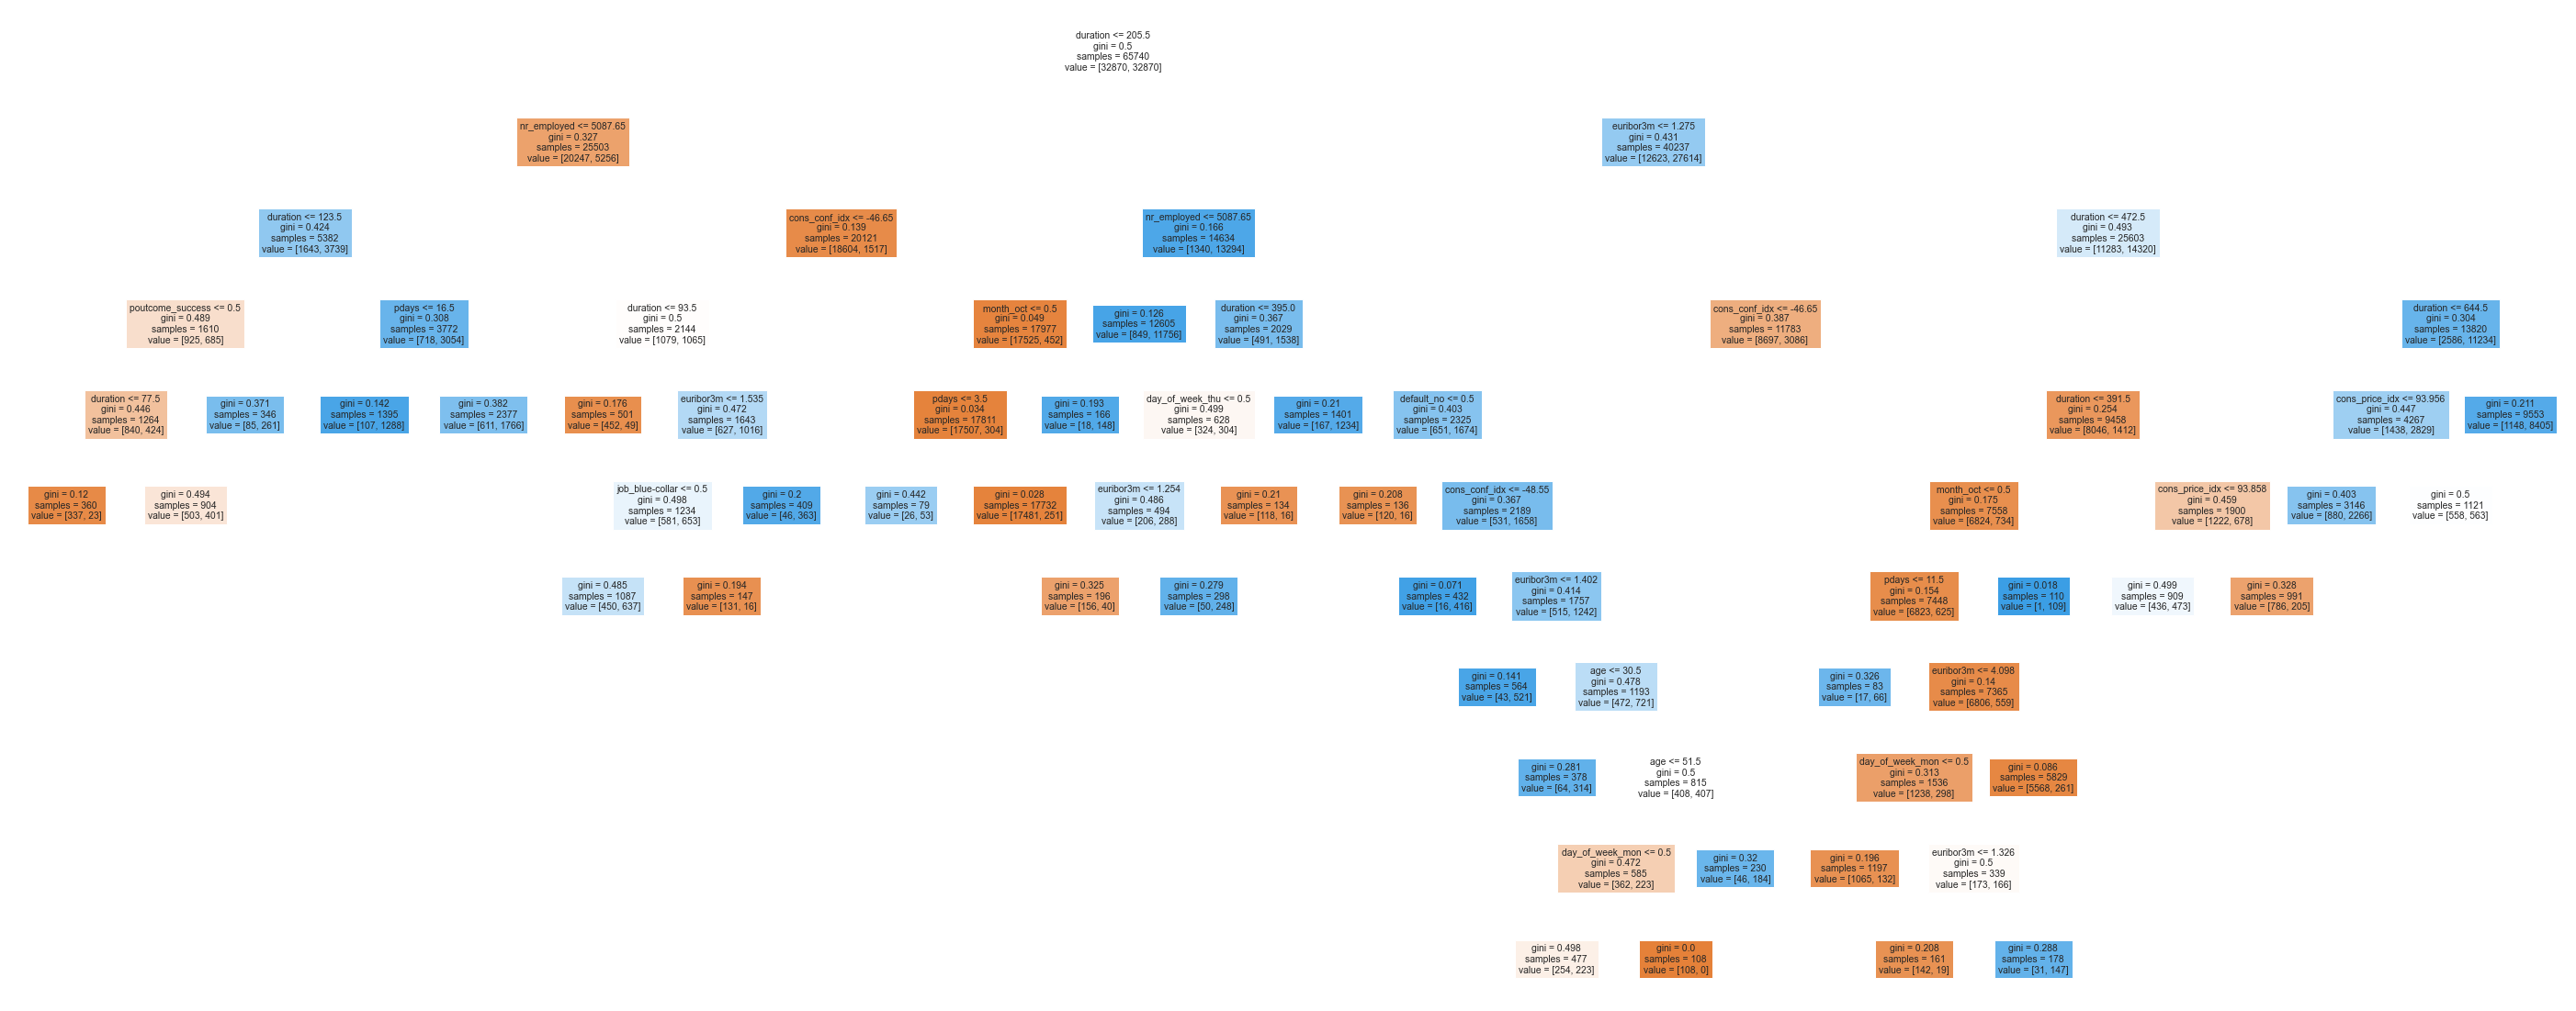

In [241]:
from sklearn import tree
import graphviz
fig = plt.figure(figsize=(50,20))
_ = tree.plot_tree(modelCV, feature_names=x.columns, filled=True)

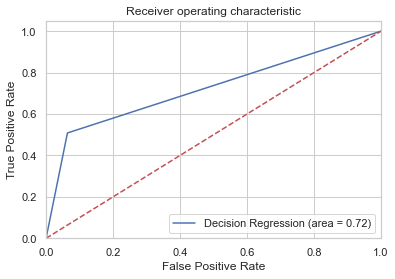

In [200]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
Decision_roc_auc = roc_auc_score(y_test, decision_tree.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, decision_tree.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Regression (area = %0.2f)' % Decision_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

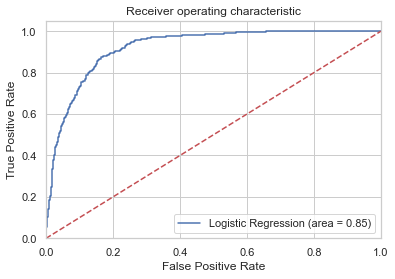

In [214]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
Log_roc_auc = roc_auc_score(Y_test, modelCV.predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, modelCV.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % Log_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()